In [1]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv("Banco de dados melhorados.csv", delimiter=";")

In [3]:
def polaridade(pol):
    if pol == 'Positivo':
        return 1.0
    elif pol == 'Neutro':
        return 0.0
    else:
        return -1.0

In [4]:
polaridades = [polaridade(dados["Polaridade"][ind]) for ind in dados.index]

In [5]:
Nvpolaridades = [polaridade(dados["Nvpolaridade"][ind]) for ind in dados.index]

In [6]:
dados["Polaridade"] = polaridades

In [7]:
dados["Nvpolaridade"] = Nvpolaridades

In [8]:
def polaridade_textblob(text):
    frase = TextBlob (text)
    traduz = TextBlob(str(frase.translate(to="en" )))
    return traduz.polarity

In [9]:
polaridades = [polaridade_textblob(dados['Frase'][ind]) for ind in dados.index]

In [10]:
dados['Analise'] = polaridades

In [11]:
dados

,Frase,Polaridade,Nvpolaridade,Analise
0,"Poderia ter sido melhor, devido ao pouco tempo...",1.0,0.0,0.062500
1,Me sai bem na avaliação pois ele desenvolveu o...,1.0,1.0,0.100000
2,"Foi um desenvolvimento mediano, poderia ter um...",0.0,0.0,0.175000
3,"Poderia ser melhor, pois não me doei o suficie...",0.0,0.0,0.250000
4,Tive um desempenho razoavel na avaliação,1.0,0.0,0.200000
5,O professor não mostrou uma completa dominio n...,1.0,-1.0,-0.051667
6,De acordo com o professor eu fui bem,1.0,1.0,0.000000
7,Me sinto frustrado com algumas materias por nã...,0.0,-1.0,-0.700000
8,Ocorreu de maneira satisfatoria,1.0,1.0,0.000000
9,"Aula bastante prudutiva, pois foi abordado div...",1.0,1.0,0.100000


In [12]:
def predicao(anls):
    if anls >= 0.1:
        return 1.0
    elif (anls <= 0.1) and (anls >= -0.1):
        return 0.0
    else:
        return -1.0

In [13]:
def acuracia(anls, pred):
    if (anls - pred) == 0:
        return 1.0
    else:
        return 0.0

In [14]:
predicao = [predicao(dados['Analise'][ind]) for ind in dados.index]

In [15]:
dados["Predicao"] = predicao

In [16]:
dados

,Frase,Polaridade,Nvpolaridade,Analise,Predicao
0,"Poderia ter sido melhor, devido ao pouco tempo...",1.0,0.0,0.062500,0.0
1,Me sai bem na avaliação pois ele desenvolveu o...,1.0,1.0,0.100000,1.0
2,"Foi um desenvolvimento mediano, poderia ter um...",0.0,0.0,0.175000,1.0
3,"Poderia ser melhor, pois não me doei o suficie...",0.0,0.0,0.250000,1.0
4,Tive um desempenho razoavel na avaliação,1.0,0.0,0.200000,1.0
5,O professor não mostrou uma completa dominio n...,1.0,-1.0,-0.051667,0.0
6,De acordo com o professor eu fui bem,1.0,1.0,0.000000,0.0
7,Me sinto frustrado com algumas materias por nã...,0.0,-1.0,-0.700000,-1.0
8,Ocorreu de maneira satisfatoria,1.0,1.0,0.000000,0.0
9,"Aula bastante prudutiva, pois foi abordado div...",1.0,1.0,0.100000,1.0


In [17]:
acuracia = [acuracia(dados['Polaridade'][ind], dados['Predicao'][ind]) for ind in dados.index]

In [18]:
dados["Acuracia"] = acuracia

In [19]:
dados["Acuracia"].value_counts()

1.0    27
0.0    18
Name: Acuracia, dtype: int64

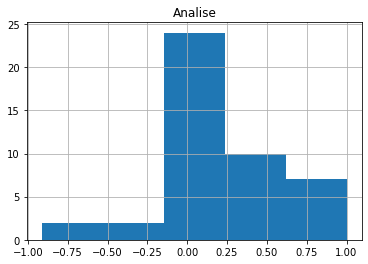

In [21]:
dados.hist(column='Analise', bins=5)
plt.show()